##### Titanic survival prediction classification

In [136]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

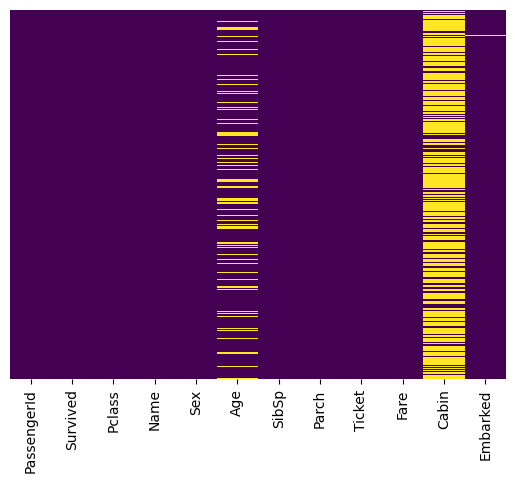

In [137]:
import seaborn as sns
import matplotlib as plt
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False, cmap='viridis')

C:\Users\ghost\AppData\Local\Temp\ipykernel_17056\3158332839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=dataset, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

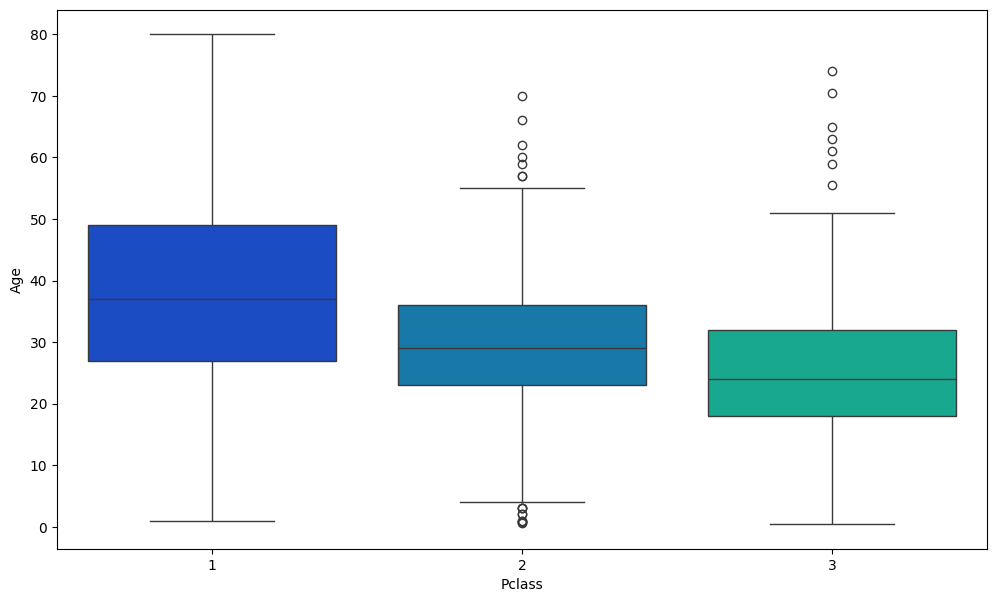

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=dataset, palette='winter')

In [139]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [140]:
dataset['Age'] = dataset[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\ghost\AppData\Local\Temp\ipykernel_17056\3029730596.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\ghost\AppData\Local\Temp\ipykernel_17056\3029730596.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

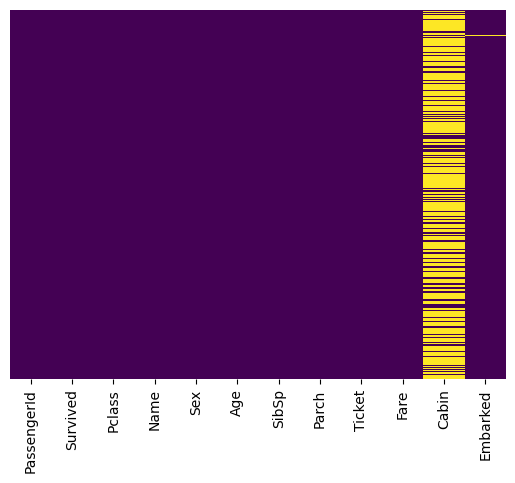

In [141]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [142]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(dataset['Embarked'], drop_first=True).astype(int)
dataset.drop(['Sex', 'Embarked', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
dataset = pd.concat([dataset,sex,embark], axis=1)

### Predictions using different classifiers

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived', axis=1),
                                                    dataset['Survived'], test_size=0.2, random_state=101)

X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
733,734,2,23.0,0,0,13.00,1,0,1
857,858,1,51.0,0,0,26.55,1,0,1
81,82,3,29.0,0,0,9.50,1,0,1
319,320,1,40.0,1,1,134.50,0,0,0
720,721,2,6.0,0,1,33.00,0,0,1


#### Feature scaling

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
model_eval = {}

#### Classification using Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
logmod = LogisticRegression()
logmod.fit(X_train, y_train)
predictions = logmod.predict(X_test)

In [148]:
acc = confusion_matrix(y_test, predictions)
acc


array([[85, 14],
       [22, 58]], dtype=int64)

In [149]:
acc = accuracy_score(y_test, predictions)
acc
model_eval['logistic regression'] = acc

#### Classification using Kernel svm

In [150]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [151]:
acc = confusion_matrix(y_test, predictions)
acc


array([[95,  4],
       [27, 53]], dtype=int64)

In [152]:
acc = accuracy_score(y_test, predictions)
acc
model_eval['kernal Svm'] = acc

#### Classification using naive bayes

In [153]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [154]:
acc = confusion_matrix(y_test, predictions)
acc


array([[86, 13],
       [24, 56]], dtype=int64)

In [155]:
acc = accuracy_score(y_test, predictions)
acc
model_eval['naive bayes'] = acc

#### Classification using k nearest neighbour

In [156]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [157]:
acc = confusion_matrix(y_test, predictions)
acc

array([[89, 10],
       [25, 55]], dtype=int64)

In [158]:
acc = accuracy_score(y_test, predictions)
acc
model_eval['knn'] = acc

#### Classification using decision tree

In [159]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [160]:
acc = confusion_matrix(y_test, predictions)
acc

array([[83, 16],
       [26, 54]], dtype=int64)

In [161]:
acc = accuracy_score(y_test, predictions)
acc
model_eval['decision tree'] = acc

#### Classification using random forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [163]:
acc = confusion_matrix(y_test, predictions)
acc

array([[89, 10],
       [25, 55]], dtype=int64)

In [164]:
acc = accuracy_score(y_test, predictions)
acc
model_eval['random forest'] = acc

In [165]:
model_eval

{'logistic regression': 0.7988826815642458,
 'kernal Svm': 0.8268156424581006,
 'naive bayes': 0.7932960893854749,
 'knn': 0.8044692737430168,
 'decision tree': 0.7653631284916201,
 'random forest': 0.8044692737430168}